# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

### Importing the libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing the dataset

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The dataset is made of numbers only.

### Statistical summary

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Shape of dataset

In [7]:
df.shape

(5000, 14)

### Null values

In [8]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no null values.

### Incorrect imputation

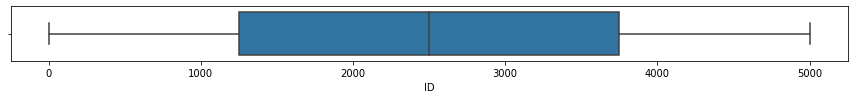

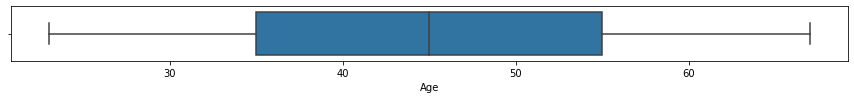

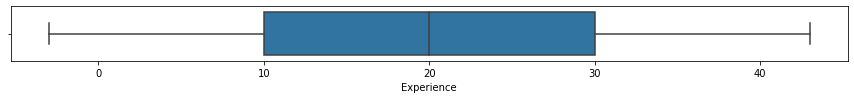

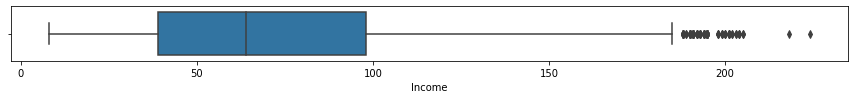

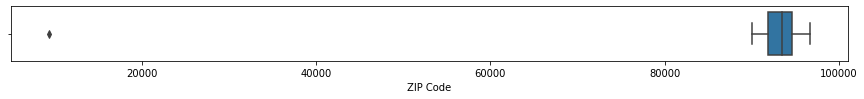

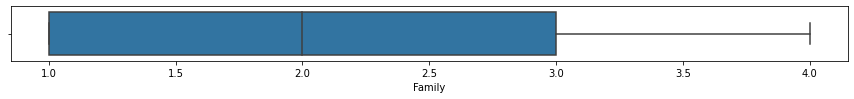

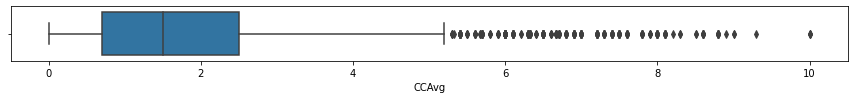

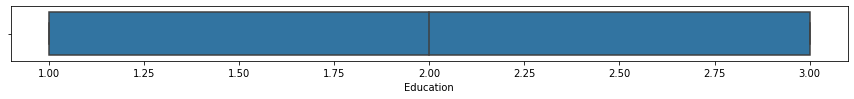

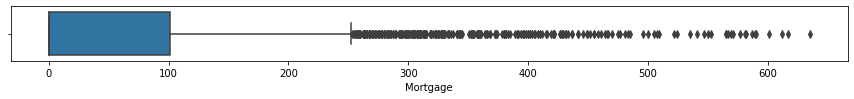

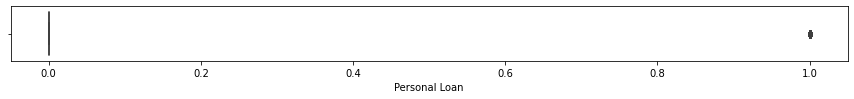

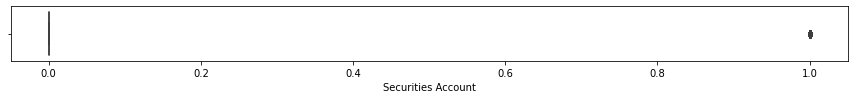

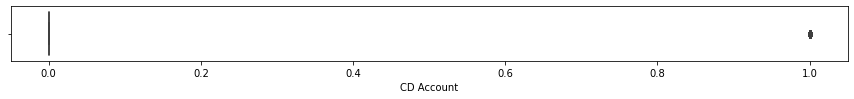

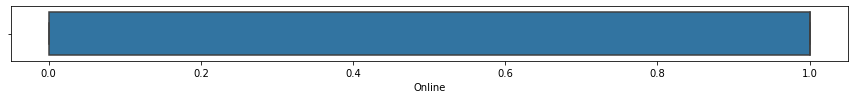

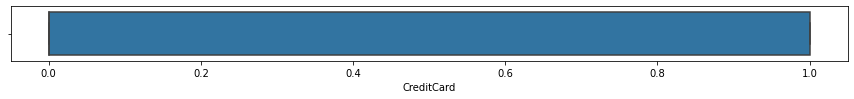

In [10]:
for i in df.columns:
    plt.figure(figsize = (15,1))
    sns.boxplot(x = df[i])
    plt.show()  

There seems to be a typo for one of the zip codes.

In [11]:
df[df['ZIP Code'] < 10000]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


Zip codes are normally expected to contain 5 digits. It seems the last digit of this zip code is missing. 
Given the size of the dataset: 5000 lines, we can afford dropping one line.

In [12]:
df.drop(384, inplace=True)

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

### Number of unique in each column?

In [13]:
for i in df.columns:
    print(i, ': ', df[i].nunique())

ID :  4999
Age :  45
Experience :  47
Income :  162
ZIP Code :  466
Family :  4
CCAvg :  108
Education :  3
Mortgage :  347
Personal Loan :  2
Securities Account :  2
CD Account :  2
Online :  2
CreditCard :  2


### Number of people with zero mortgage?

In [14]:
print('There are {} people with zero mortgage.'.format(len(df[df['Mortgage'] == 0])))

There are 3461 people with zero mortgage.


### Number of people with zero credit card spending per month?

In [15]:
print('There are {} people with zero credit card spending.'.format(len(df[df['CCAvg'] == 0])))

There are 106 people with zero credit card spending.


### Value counts of all categorical columns.

In [16]:
for i in ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print(df[i].value_counts(), '\n')

1    1472
2    1296
4    1221
3    1010
Name: Family, dtype: int64 

1    2096
3    1500
2    1403
Name: Education, dtype: int64 

0    4519
1     480
Name: Personal Loan, dtype: int64 

0    4477
1     522
Name: Securities Account, dtype: int64 

0    4697
1     302
Name: CD Account, dtype: int64 

1    2983
0    2016
Name: Online, dtype: int64 

0    3530
1    1469
Name: CreditCard, dtype: int64 



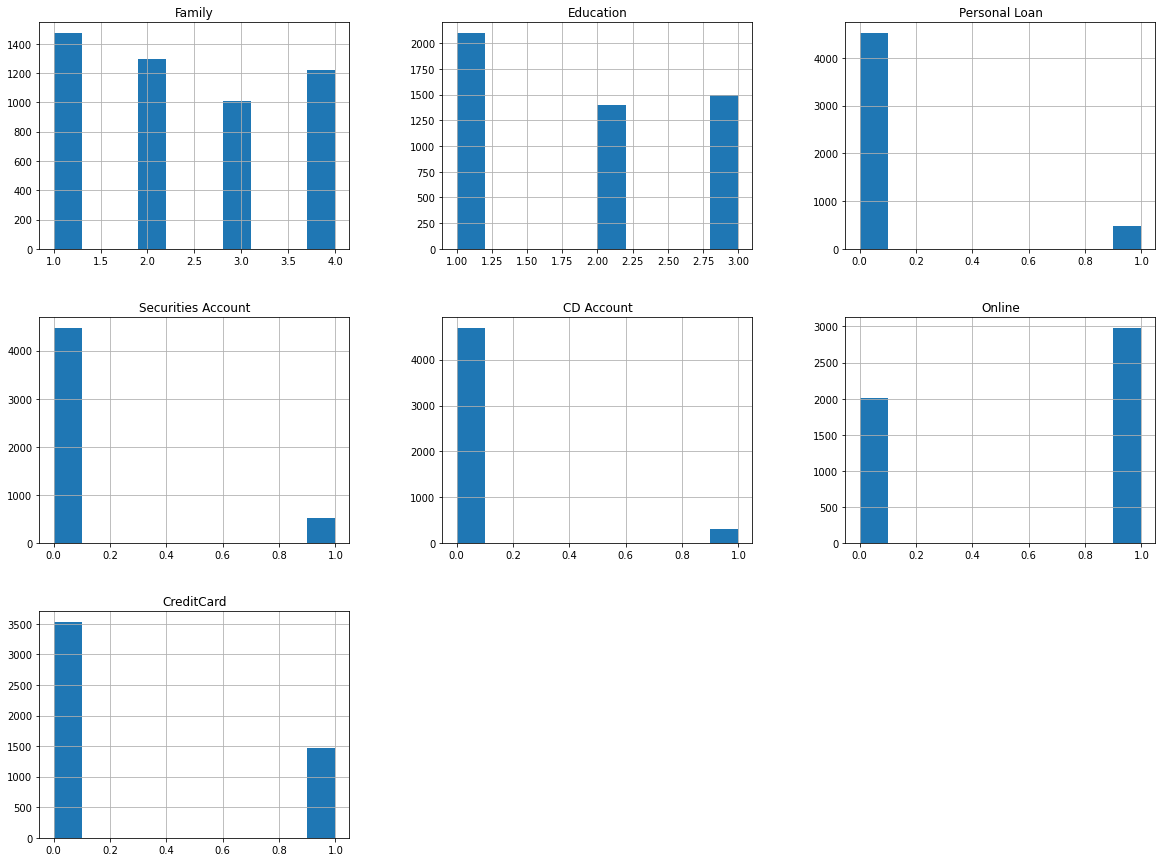

In [17]:
df[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].hist(figsize=(20,15), layout=(3,3)); 

### Univariate and Bivariate

#### Correlations

In [18]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008330,-0.008203,-0.018037,0.002225,-0.016394,-0.024906,0.021862,-0.014086,-0.024902,-0.017076,-0.006985,-0.002288,0.017491
Age,-0.008330,1.000000,0.994215,-0.055164,-0.030526,-0.046566,-0.051941,0.041211,-0.012484,-0.007694,-0.000403,0.008068,0.013622,0.007530
Experience,-0.008203,0.994215,1.000000,-0.046483,-0.030452,-0.052694,-0.050015,0.013041,-0.010535,-0.007385,-0.001203,0.010375,0.013829,0.008837
Income,-0.018037,-0.055164,-0.046483,1.000000,-0.030725,-0.157232,0.645931,-0.187277,0.206712,0.502459,-0.002695,0.169703,0.014397,-0.002030
ZIP Code,0.002225,-0.030526,-0.030452,-0.030725,1.000000,0.027532,-0.012197,-0.008254,0.003608,-0.002977,0.002418,0.021669,0.028328,0.024055
Family,-0.016394,-0.046566,-0.052694,-0.157232,0.027532,1.000000,-0.109088,0.064581,-0.020294,0.061471,0.020094,0.014184,0.010127,0.011160
CCAvg,-0.024906,-0.051941,-0.050015,0.645931,-0.012197,-0.109088,1.000000,-0.135952,0.109829,0.366864,0.015035,0.136504,-0.003486,-0.006454
Education,0.021862,0.041211,0.013041,-0.187277,-0.008254,0.064581,-0.135952,1.000000,-0.033186,0.136834,-0.010723,0.014004,-0.015227,-0.011432
Mortgage,-0.014086,-0.012484,-0.010535,0.206712,0.003608,-0.020294,0.109829,-0.033186,1.000000,0.142065,-0.005449,0.089286,-0.005904,-0.007061
Personal Loan,-0.024902,-0.007694,-0.007385,0.502459,-0.002977,0.061471,0.366864,0.136834,0.142065,1.000000,0.021932,0.316344,0.006332,0.002903


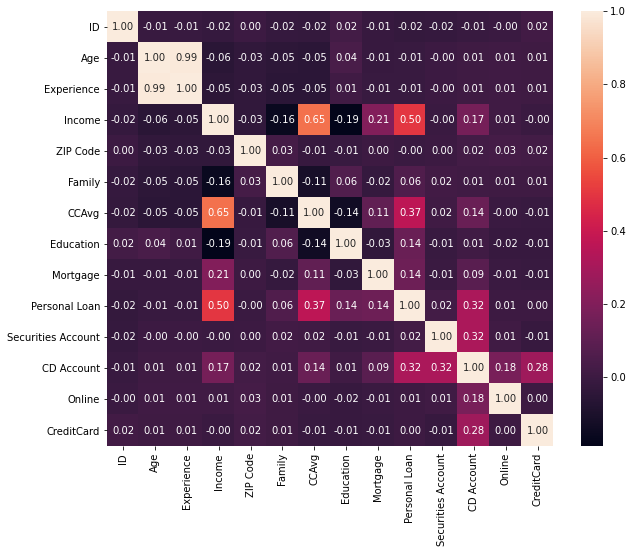

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), fmt='.2f', annot=True);

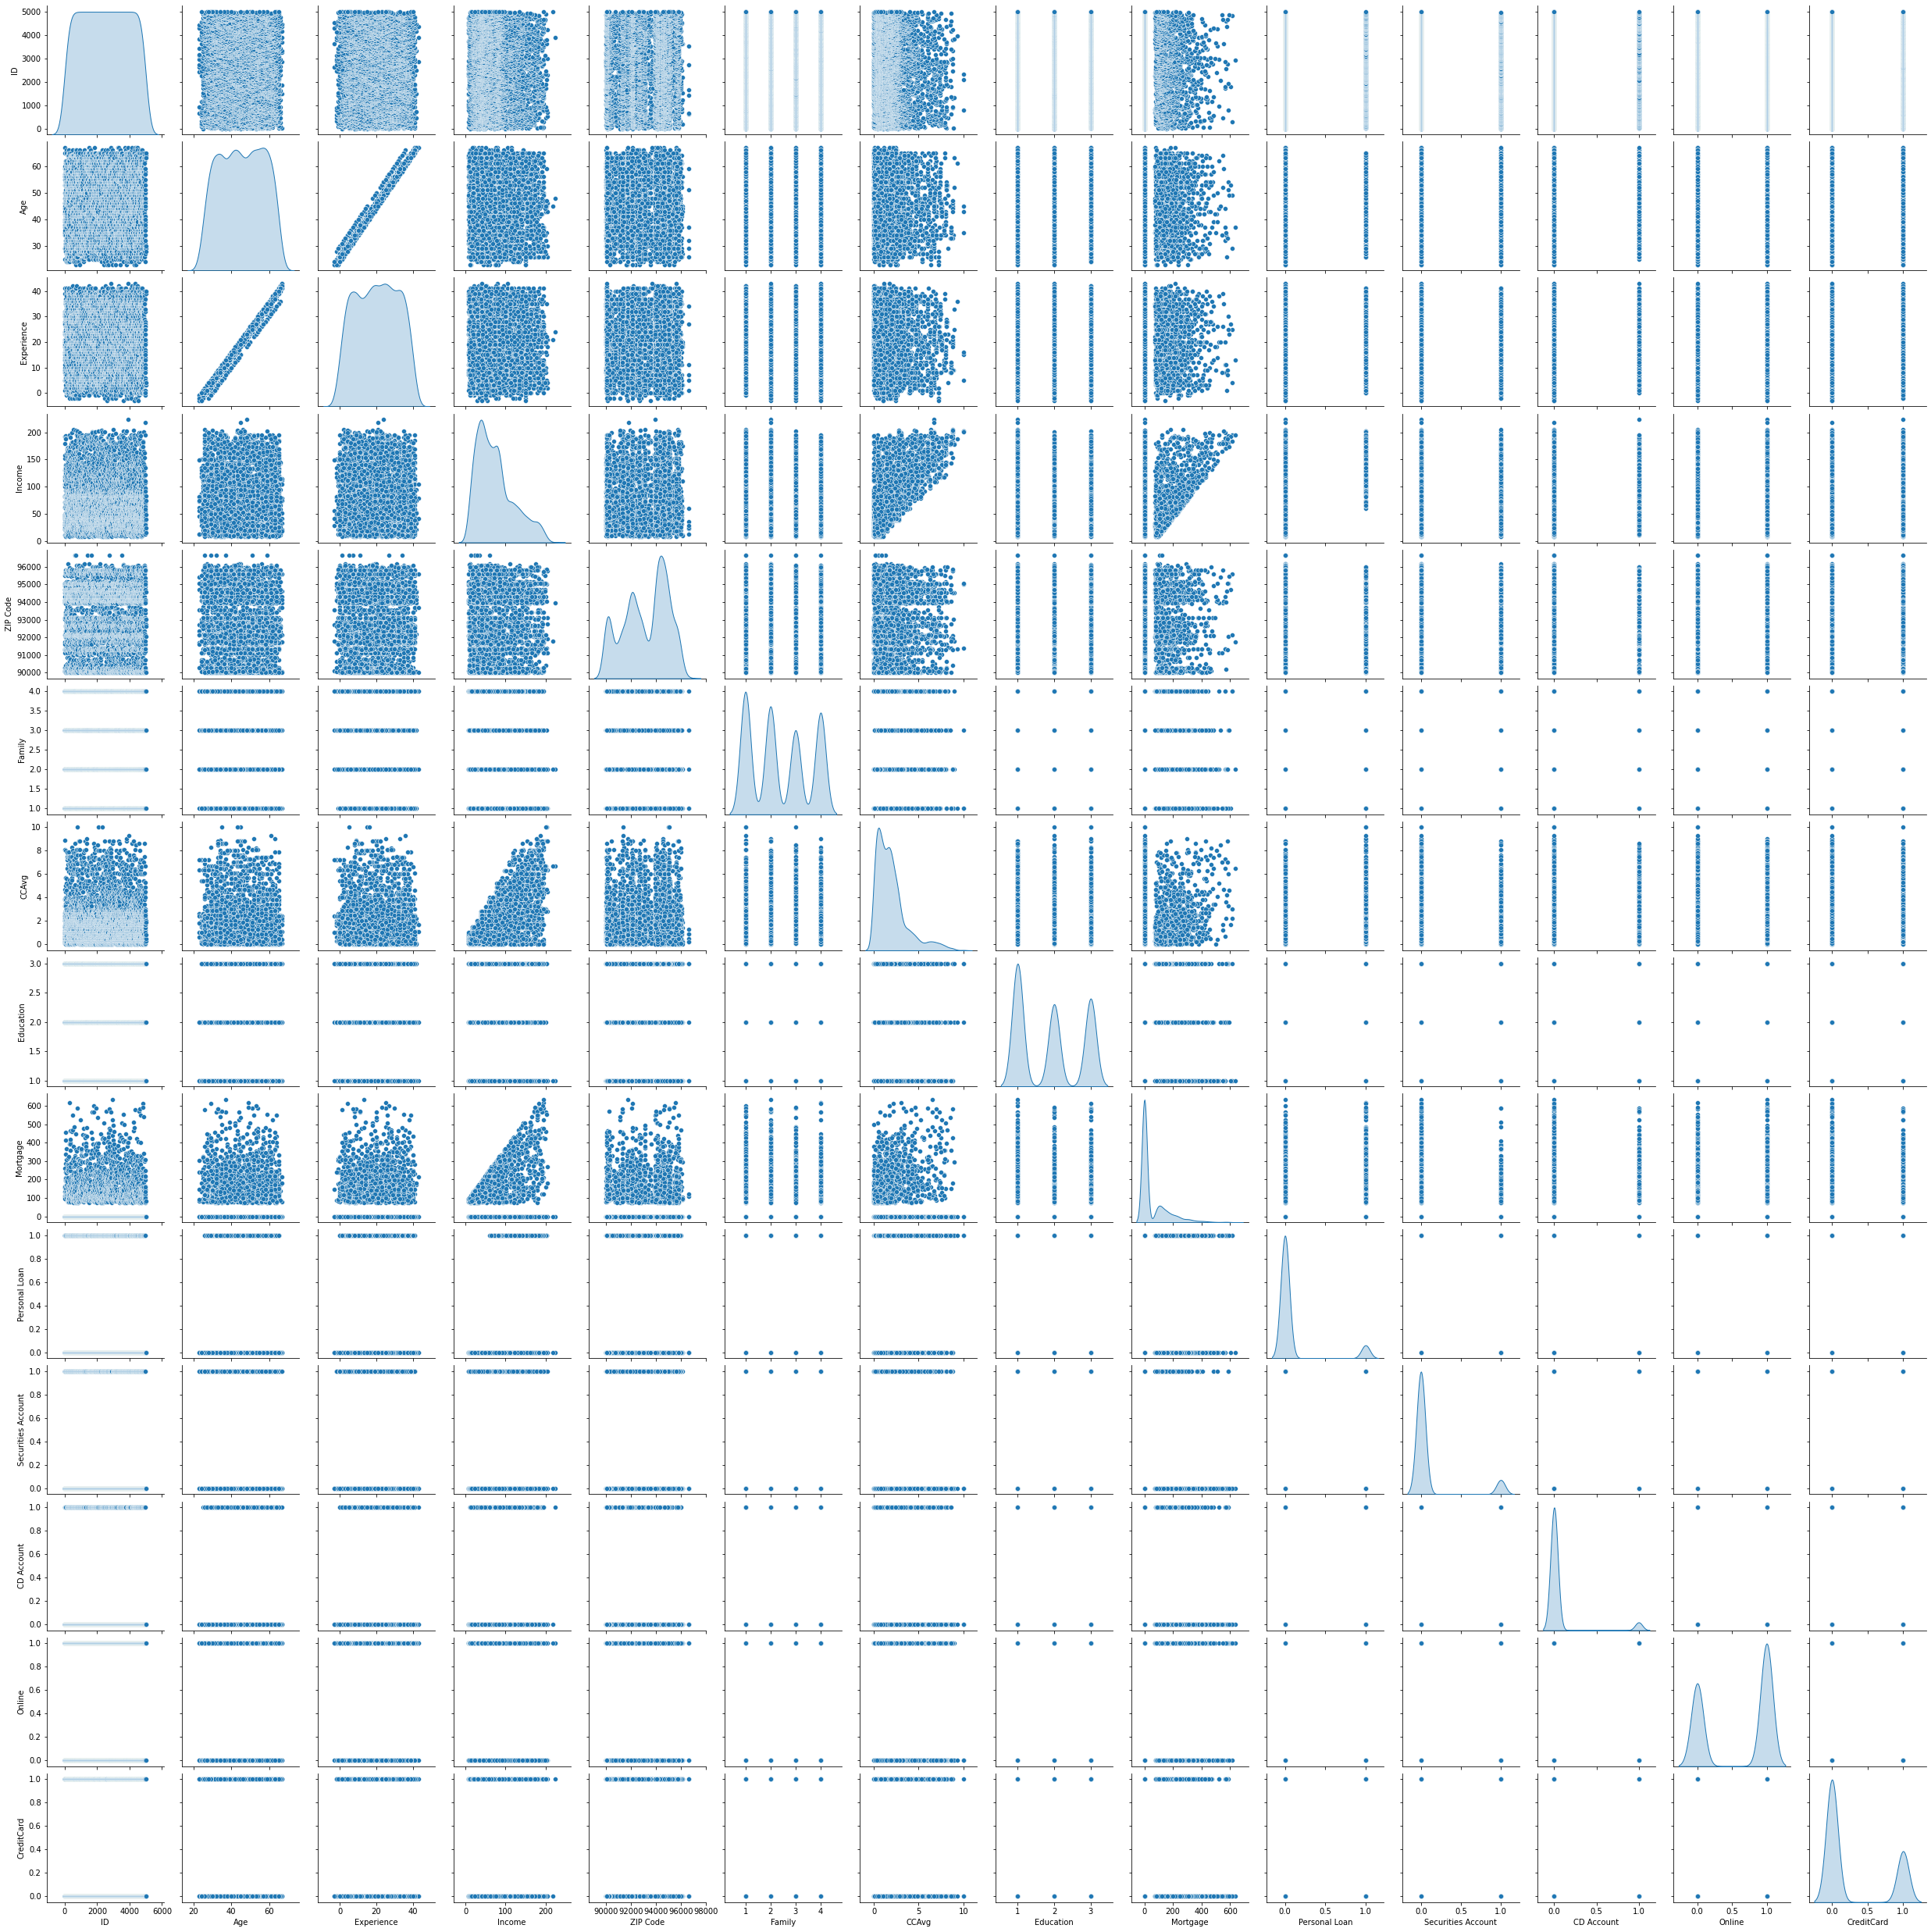

In [20]:
sns.pairplot(df,diag_kind='kde');

Age and experience are highly correlated with a coefficient of 99%. We recommend to drop one of these two columns in order to avoid any colinearity issue.

#### Bivariate analysis

In [22]:
df.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.636203,45.366010,20.131224,66.247400,93170.982740,2.373091,1.729259,1.843328,51.800841,0.102235,0.035849,0.595707,0.293428
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


#### Insights:

Customers who accepted the personal loan tend to have:
* a higher income : 144,745 USD p.a. vs 66,247 USD p.a. on average.
* a larger family with an average household size of 2.61 vs 2.37 persons.
* a larger spending on credit cards with an average per month of 3,905 USD vs 1,729 USD.
* a higher education level with an average of 2.23 vs 1.84
* a more expensive house mortgage with an average of 100,845 USD vs 51,800 USD
* more often a certificate of deposit account with the bank (29.1 % vs 3.5%)

### Get data model ready

Dropping useless columns

In [60]:
X = df.drop(columns=['ID', 'Experience', 'Personal Loan'])
y = df['Personal Loan']

# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

Checking y ratios are preserved in split

In [47]:
print(y.value_counts(normalize=True),'\n')
print(y_train.value_counts(normalize=True),'\n')
print(y_test.value_counts(normalize=True),'\n')

0    0.903981
1    0.096019
Name: Personal Loan, dtype: float64 

0    0.903973
1    0.096027
Name: Personal Loan, dtype: float64 

0    0.904
1    0.096
Name: Personal Loan, dtype: float64 



# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. (15 marks)

Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). 
Draw a heatmap to display confusion matrix

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_score, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.53      0.32      0.40       144

    accuracy                           0.91      1500
   macro avg       0.73      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500



In [64]:
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,model.predict_proba(X_test)[:,1] ))

Trainig accuracy 0.9082595027150614

Testing accuracy 0.9073333333333333

Recall: 0.3194444444444444

Precision: 0.5287356321839081

F1 Score: 0.39826839826839827

Roc Auc Score: 0.9162057522123894


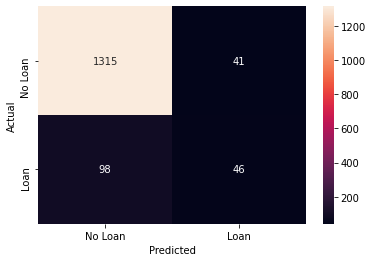

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,  fmt='d', xticklabels = ["No Loan","Loan"] , yticklabels = ["No Loan","Loan"] )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

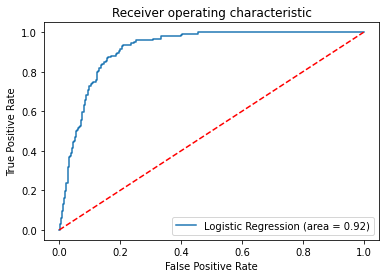

In [66]:
logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

Attribute coefficients

In [72]:
## Feature Importance
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),6)
fi.sort_values(by='Coeff',ascending=False).reset_index(drop=True)

,Col,Coeff
0,Income,0.037255
1,CCAvg,0.001017
2,Mortgage,0.000645
3,Education,0.000252
4,Family,0.000172
5,CD Account,0.000133
6,ZIP Code,0.000067
7,Age,0.000023
8,Online,0.000018
9,Securities Account,0.000010


Displaying rows in test data where predicted class different from observed class

In [73]:
predictions = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
predictions[predictions['actual'] != predictions['predicted']]

,actual,predicted
1066,1,0
1022,1,0
322,1,0
2910,1,0
917,0,1
...,...,...
1225,1,0
3864,1,0
2533,1,0
1870,1,0


139 out of 1500 rows where prediction is different

# 6. Give conclusion related to the Business understanding of your model? (5 marks)

### Feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(sc_x.transform(X_test), columns= X_test.columns)

In [75]:
X_train.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-0.378828,0.415695,1.398675,-1.212677,0.476713,1.318075,-0.560196,-0.345430,-0.254599,0.836776,-0.643224
1,0.750012,-0.650076,-1.062710,-0.338880,0.193439,1.318075,-0.560196,-0.345430,-0.254599,0.836776,-0.643224
2,0.923680,-0.345570,1.083800,-1.212677,-0.089835,1.318075,1.741116,-0.345430,-0.254599,0.836776,-0.643224
3,1.010514,1.329213,-1.750643,0.534916,1.609807,0.133703,-0.560196,2.894943,3.927751,0.836776,-0.643224
4,0.229009,-0.693577,1.078096,0.534916,-0.769692,0.133703,0.595235,-0.345430,-0.254599,0.836776,-0.643224


In [76]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.81      0.60      0.69       144

    accuracy                           0.95      1500
   macro avg       0.88      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



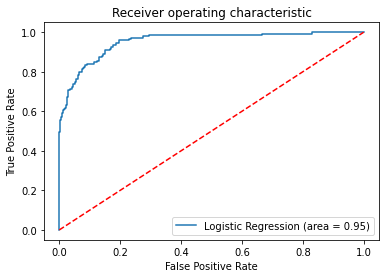

In [79]:
logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature importance

In [81]:
## Feature Importance
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False).reset_index(drop=True)

,Col,Coeff
0,Income,2.62
1,Education,1.49
2,CD Account,0.83
3,Family,0.82
4,CreditCard,0.43
5,Online,0.30
6,Securities Account,0.24
7,Age,0.16
8,CCAvg,0.15
9,Mortgage,0.07


### Conclusions

* Feature scaling improves the model's performance. It allows also a better interpretation of the coefficients of the logistic regression in order to infer the feature importance.
* With the use of feature scaling, the model predicts the likelihood of a liability customer buying personal loans with a recall score of 60%.
* The customer's income, education level, presence of a certificate of deposit account with the bank and family size are important parameters in order to predict whether the customer will accept the personal loan. Customers who accept the personal loan tend to have a higher income and education level, have more often a certificate of deposit account with the bank as well a a larger family.